In [7]:
#6030812921 ธนาธิป ไชยอนันต์พร
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv')

In [3]:
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [4]:
data.dtypes

title         object
latitude     float64
longitude    float64
dtype: object

In [5]:
!pip install folium

In [11]:
from sklearn.cluster import AgglomerativeClustering as Agg
hotspot = np.array(data[['latitude','longitude']].values.tolist())
hotspot

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [35]:
Clustering = Agg(distance_threshold=0.005, n_clusters=None).fit(hotspot)
agg_label=Clustering.labels_
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(Clustering, **kwargs):
    counts = np.zeros(Clustering.children_.shape[0])
    n_samples = len(Clustering.labels_)
    for i, merge in enumerate(Clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([Clustering.children_, Clustering.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [70]:
import folium 
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import pandas as pd
longitude =  100.5538272857666
latitude = 13.734465925243732
map = folium.Map(location=[latitude, longitude],zoom_start =14) 
data = data

heat_data = [[row['latitude'],row['longitude'],] for index, row in data.iterrows()]

HeatMap(heat_data).add_to(station_map)

station_map

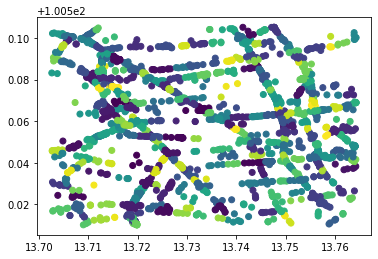

In [72]:
plt.scatter(data['latitude'], data['longitude'], c=agg_label)
plt.show()